In [2]:
# dataset 불러오기
import pandas as pd
import numpy as np
import matplotlib as plt
# jupyter에서 matplotlib의 결과를 아래 바로 보이게 하기 위해 %matplotlib inline을 입력합니다.
%matplotlib inline

# 다운로드 받은 데이터를 pandas의 dataframe형태로 읽어옵니다.
df = pd.read_csv("/media/ssd/projects/python/Aries/DataGenerator/power.csv")

In [3]:
df.head(10)

,total_power,mobile_tx_packets,package_name,wifi_rx_packets,usage_power_mah,mobile_rx_packets,cpu_power_mah,wifi_tx_packets,sum_power,wakelock_power_mah
0,368.148251,0,0,0,368.148251,0,0.000000,0,368.148251,0.000000
1,244.529712,0,0,0,244.529712,0,0.000000,0,244.529712,0.000000
2,146.674148,10961,com.kakao.talk,86,0.000000,10059,25.247338,81,146.674148,2.330854
3,104.183923,2,android.uid.system:1000,0,0.000000,2,101.793066,0,104.183923,1.423576
4,82.481634,828,0,79,0.000000,1372,51.255374,46,82.481634,15.183516
5,66.129449,4747,com.facebook.katana,54,0.000000,6484,3.710839,47,66.129449,0.063086
6,64.656335,1524,com.google.uid.shared:10009,166,0.000000,1256,7.074114,186,64.656335,2.504727
7,62.210709,0,0,0,0.000000,0,0.000000,0,62.210709,0.000000
8,52.653254,0,99031,0,0.000000,0,52.653254,0,52.653254,0.000000
9,25.871967,7346,com.android.chrome,0,0.000000,7792,9.865977,0,25.871967,0.021428


In [4]:
package_df = df.groupby('package_name').sum()
package_df.head(10)

,total_power,mobile_tx_packets,wifi_rx_packets,usage_power_mah,mobile_rx_packets,cpu_power_mah,wifi_tx_packets,sum_power,wakelock_power_mah
package_name,,,,,,,,,
0,772953.355219,981978,467219,635035.733558,1653518,54239.393091,204523,772953.355219,12934.568951
1006,10.026885,0,0,0.000000,0,10.026885,0,10.026885,0.000000
1013,15110.994649,0,0,0.000000,0,14212.999466,0,15110.994649,897.995183
1014,1.794205,0,0,0.000000,0,1.794205,0,1.794205,0.000000
1017,3.519066,0,0,0.000000,0,3.519066,0,3.519066,0.000000
1021,161.183840,0,0,0.000000,0,161.183840,0,161.183840,0.000000
1023,14.894356,0,0,0.000000,0,14.894356,0,14.894356,0.000000
1036,2587.667362,0,0,0.000000,0,2587.667362,0,2587.667362,0.000000
3005,183.428234,0,0,0.000000,0,183.428234,0,183.428234,0.000000


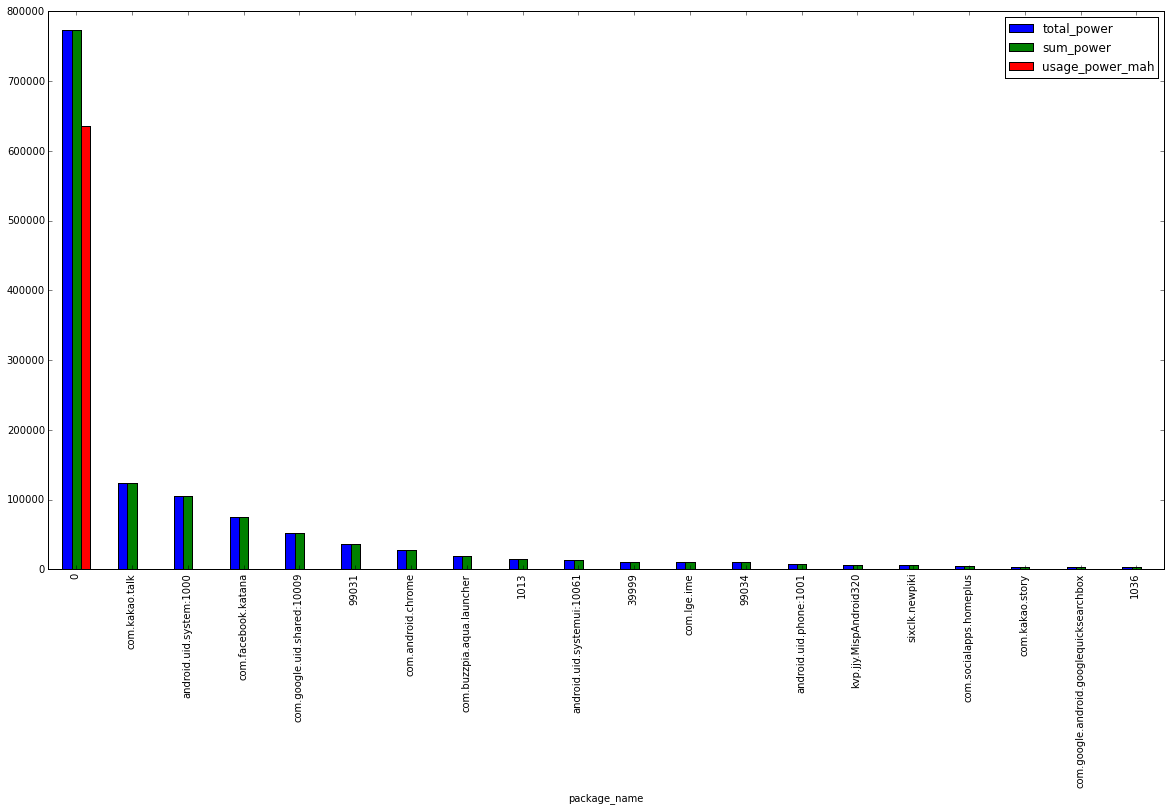

In [9]:
# power 사용량 Top N
package_df = package_df.sort_values(by='total_power', ascending=False) 
N = 20
package_df[['total_power','sum_power','usage_power_mah']].head(N).plot(figsize=(20,10), kind='bar')

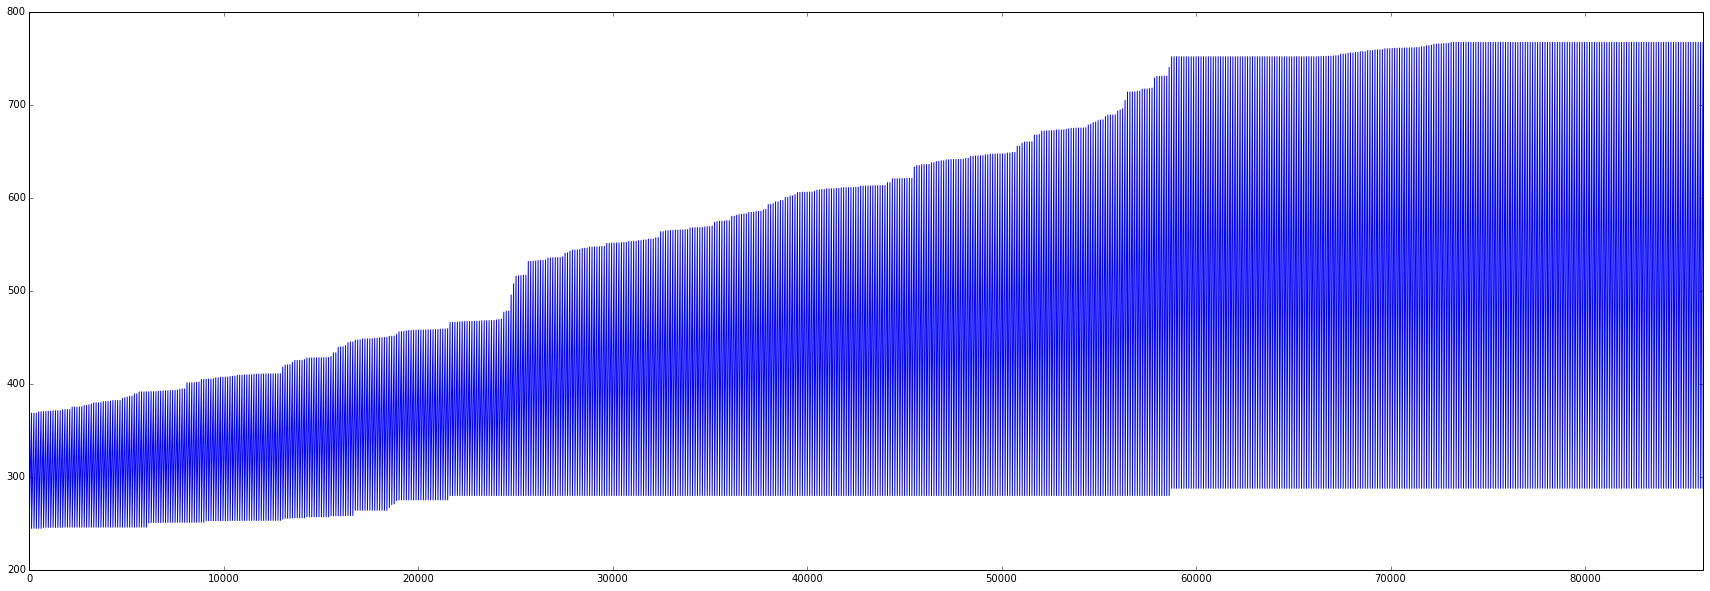

In [18]:
df[df['total_power']>200]['total_power'].plot(kind='line', figsize=(30,10))
#df['total_power'].plot(kind='line', figsize=(100,10))

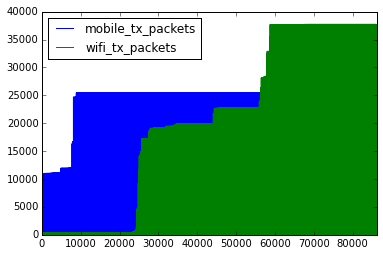

In [19]:
df[['mobile_tx_packets','wifi_tx_packets']].plot()

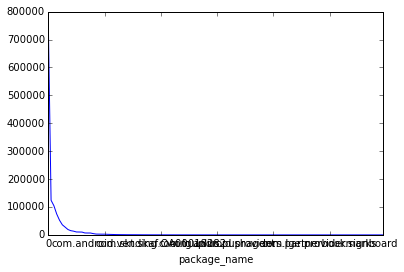

In [20]:
package_df['']['total_power'].plot()

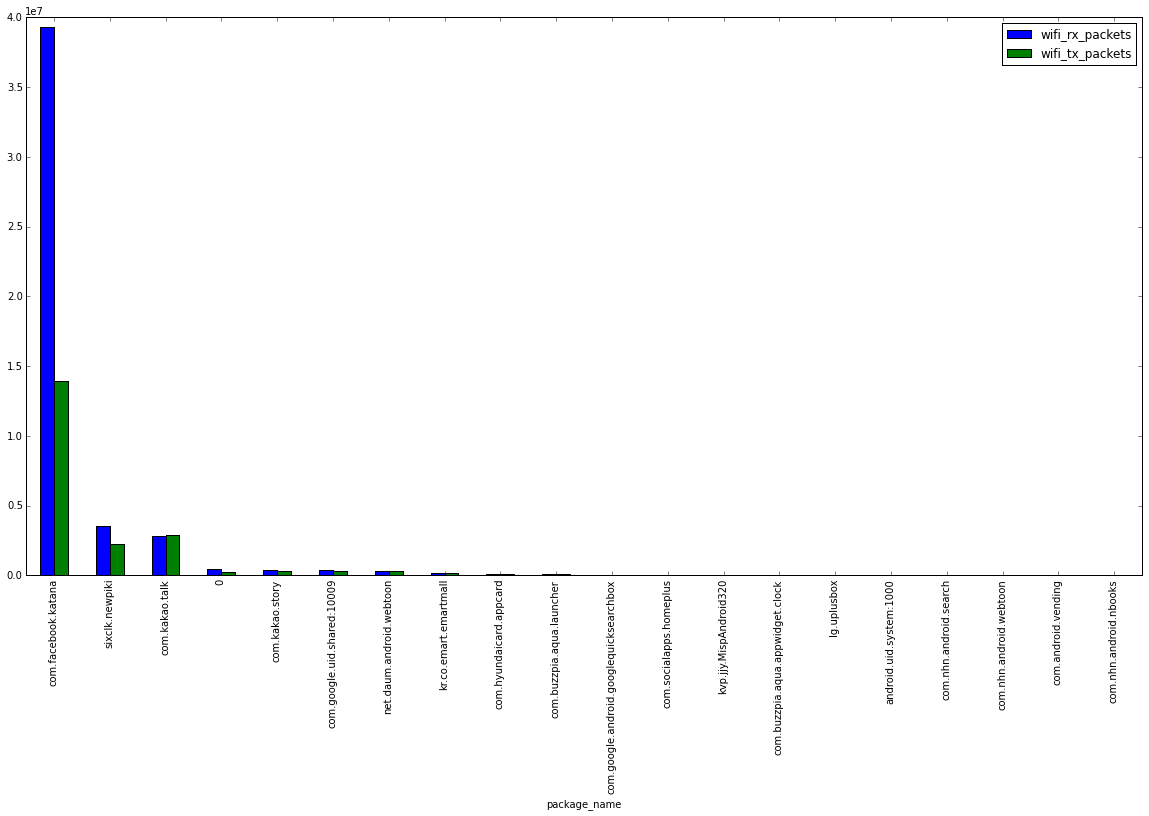

In [62]:
# wifi packets 사용량 Top N
package_df = package_df.sort_values(by=['wifi_rx_packets', 'wifi_tx_packets'], ascending=False)
N = 20
package_df[['wifi_rx_packets','wifi_tx_packets']].head(N).plot(figsize=(20,10), kind='bar')

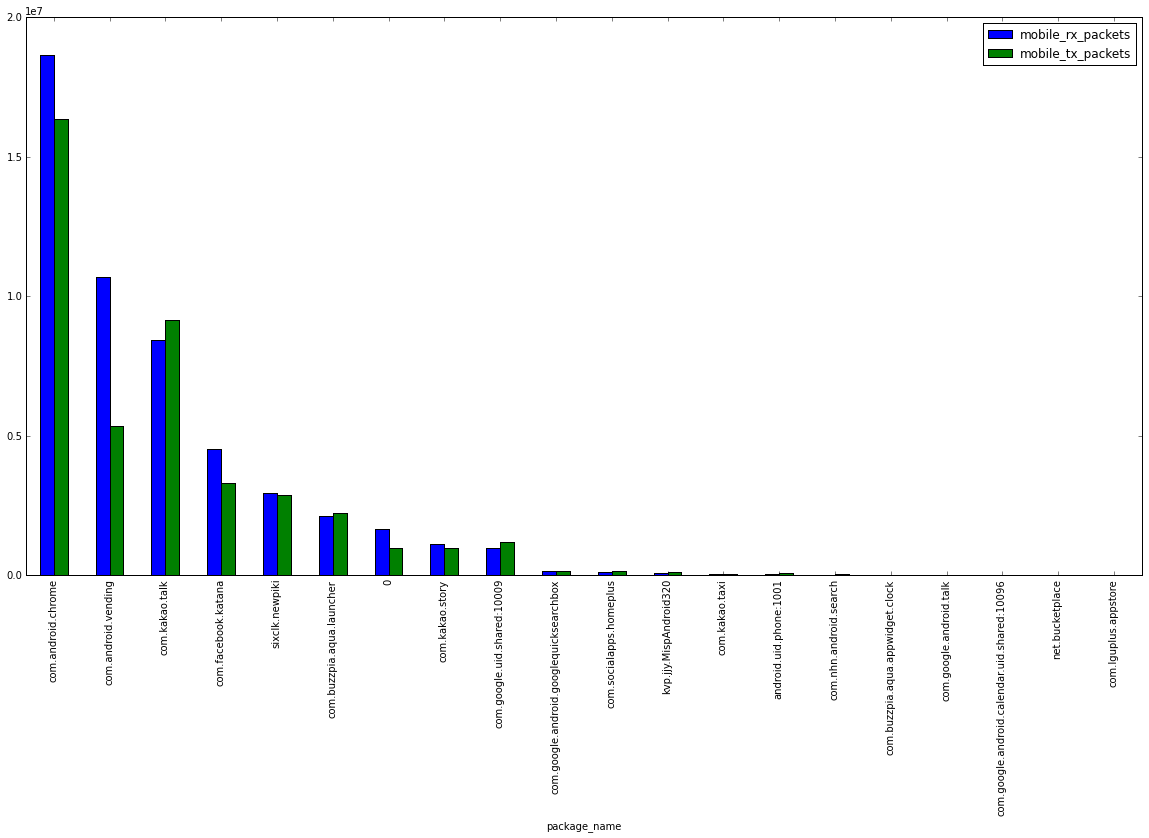

In [55]:
# mobile packets 사용량 Top N
package_df = package_df.sort_values(by=['mobile_rx_packets', 'mobile_tx_packets'], ascending=False)
N = 20
package_df[['mobile_rx_packets','mobile_tx_packets']].head(N).plot(figsize=(20,10), kind='bar')

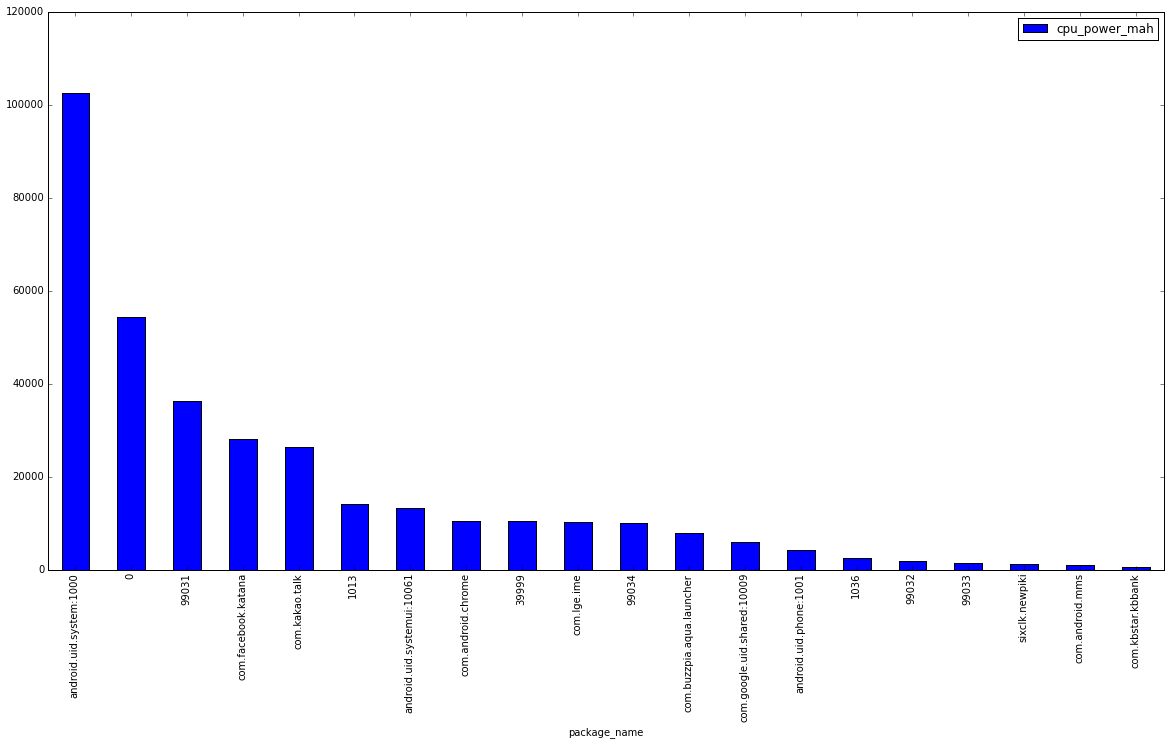

In [65]:
# cpu power mah column으로 정렬
package_df = package_df.sort_values(by=['cpu_power_mah'], ascending=False)
N = 20
package_df[['cpu_power_mah']].head(N).plot(figsize=(20,10), kind='bar')

In [71]:
# min, max normalization 
def normalization(df, x, y):
    df_norm = (df - df.min()) / (df.max()-df.min()) 

    # range normalization [x, y] ex) [0, 100] 
    range = y - x
    normalized_df = (df_norm * range) + x
    return normalized_df

In [76]:
normalized_df = normalization(package_df, 0, 10)

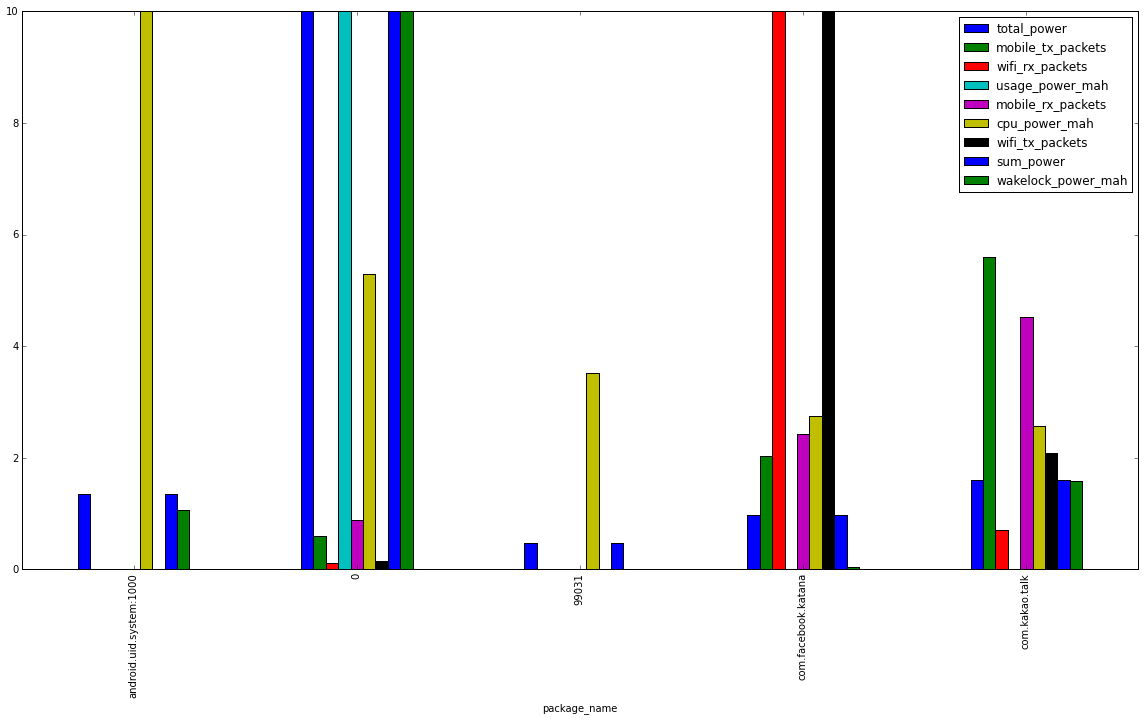

In [79]:
N = 5
normalized_df.head(N).plot(figsize=(20,10), kind='bar')

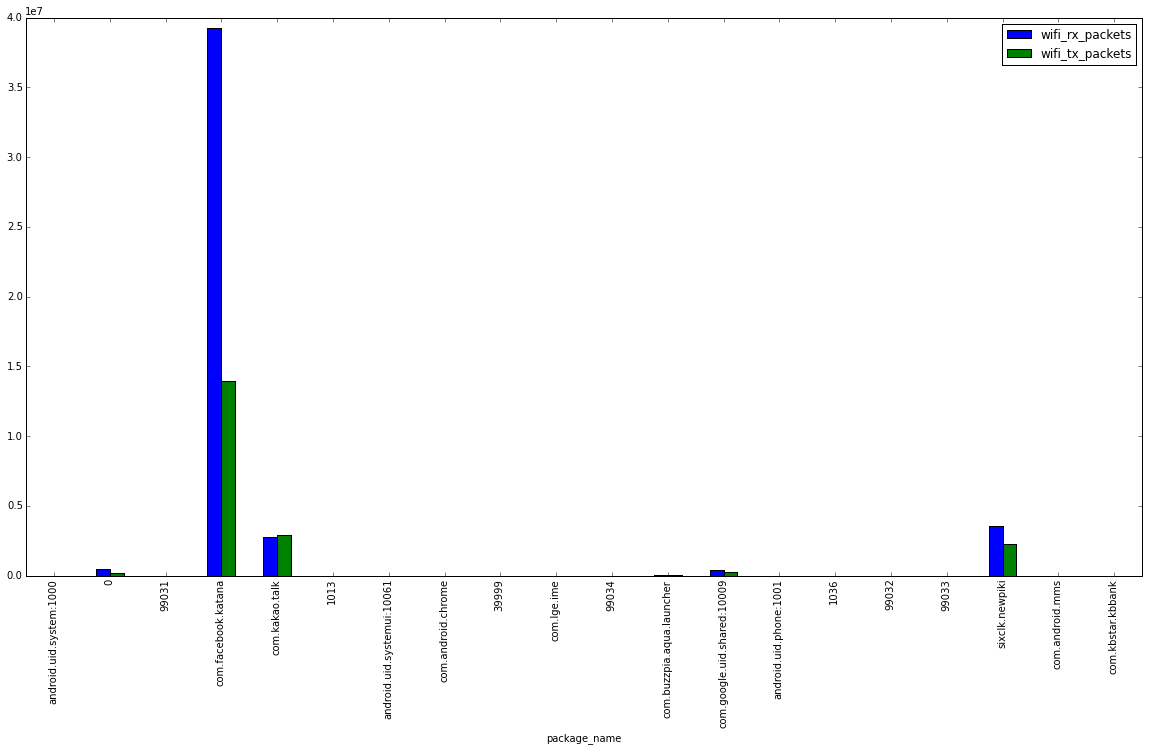

In [82]:
N = 20
package_df[['wifi_rx_packets','wifi_tx_packets']].head(N).plot(figsize=(20,10), kind='bar')